In [8]:
from orphics import io, maps, lensing, cosmology, stats
from pixell import enmap, curvedsky
import numpy as np
import os, sys
import healpy as hp
import matplotlib.pylab as plt
import symlens as s
from symlens import utils
import importlib
from mpi4py import MPI
import pandas as pd

In [9]:
# use maps provided by websky
map_path = 'maps/websky/'
# path of output data
data_path = 'data/'
# path of output plots
plot_path = 'temp'

In [10]:
# lmin, lmax for cmb maps
ellmin, ellmax = 100, 4000
# lmin, lmax for reconstructed kappa map
Lmin, Lmax = 40, 4000
# bin width for reconstructed kappa powerspectrum
delta_L = 40

# noise level for temperature and polarization maps, here we only investiget temperature maps
nlev_t = 5
nlev_p = np.sqrt(2)*nlev_t
# beam size
beam_arcmin = 10
# pixel size in arcmin
px_arcmin = 1.
# size of cutout square
width_deg = 30

In [11]:
# Let's define a cut-sky cylindrical geometry with 1 arcminute pixel width
# and a maximum declination extent of +- 15 deg (see below for reason)
# band width in deg
decmax = 30
# shape and wcs  of the band
band_shape, band_wcs = enmap.band_geometry(dec_cut=np.deg2rad(decmax),
                                 res=np.deg2rad(px_arcmin / 60.))

band_modlmap = enmap.modlmap(band_shape, band_wcs)

In [12]:
# read in ksz_band map
ksz_map = hp.read_map(map_path+'ksz_patchy.fits',hdu=1)
#ksz_alm = hp.map2alm(ksz_map, lmax=ellmax)
#ksz_band = curvedsky.alm2map(ksz_alm, enmap.empty(band_shape, band_wcs))

/global/homes/h/hongbo/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [13]:
# Get ksz's powerspectrum and smooth it
ksz_cl = hp.anafast(ksz_map)

In [24]:
ksz_cl.shape[0]

12288

In [30]:
# x axis?
ksz_dict = {"ell":np.arange(0,ksz_cl.shape[0]),"ksz_cl":ksz_cl}
ksz_df = pd.DataFrame(ksz_dict)
ksz_df.to_csv(data_path + 'ksz_cl.csv', index=False)

In [35]:
ksz_data = pd.read_csv(data_path + 'ksz_cl.csv')

In [36]:
ell, ksz_cl = ksz_data['ell'], ksz_data['ksz_cl']

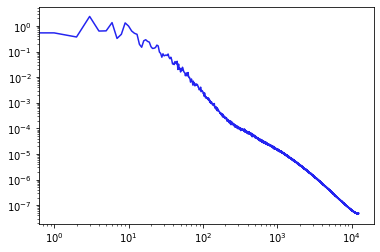

In [38]:
plt.loglog(ell, ksz_cl)